In [1]:
### Variables Selection
TYPE_PC = False # True For Mac   -   False Ubuntu
DATASET = "AMZ" # AMZ, HC, PM, UN, TOY
NODE_TYPE = True

In [2]:
import sys

if TYPE_PC:
    sys.path.append('/home/daniel/Documents/phd/phd-thesis-lab/12-third_year/05-CommunityDetection/')
else:
    sys.path.append('/home/daniel/Documents/phd/phd-thesis-lab/12-third_year/05-CommunityDetection/')

import pandas as pd
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import auxiliar_path

In [3]:
### Global variables

PATH_DATASET = auxiliar_path.get_path_dataset(DATASET)
PATH_NODETYPE = auxiliar_path.get_path_topbot(NODE_TYPE)

if TYPE_PC:
    GLOBAL_PATH = "/Users/ddiaz/Documents/code/phd-thesis-lab/12-third_year/"    
else:
    GLOBAL_PATH = "/home/daniel/Documents/phd/phd-thesis-lab/12-third_year/"

# File CSVpa
### GLOBAL variables
GRAPH_PATH = ( GLOBAL_PATH + "00-Data/" + PATH_DATASET + "/02-Graphs/" +
              PATH_NODETYPE + "/" +
              "AMZ_top_master_NC_alpha2.graphml"
              )
# print(GRAPH_PATH)

In [4]:
### Read GRAPH

g = ig.read(GRAPH_PATH)
print(g.summary(), "\n")

print("Graph info:")
print("\t|V| =", g.vcount())
print("\t|E| =", g.ecount())
print("\t d  =", g.density()) 

IGRAPH U-WT 9560 1253277 -- 
+ attr: freq (v), id (v), type (v), weight (e) 

Graph info:
	|V| = 9560
	|E| = 1253277
	 d  = 0.02742879391193473


In [5]:
### Community Detection

comms = g.community_multilevel(weights=g.es["weight"])
g.vs["cls"] = comms.membership
print(comms.summary(), "\n")
comms_with_one = {subgraph.vs["cls"][0]: subgraph for i, subgraph in enumerate(comms.subgraphs()) if len(subgraph.vs) > 5}
comms_to_remove = [sg for sg in comms.subgraphs() if len(sg.vs) <= 5]
nodes_to_remove = []
for i in comms_to_remove:
    for node in i.vs:
        nodes_to_remove.append(node["id"])
len(nodes_to_remove)
asd = []
for node in nodes_to_remove:
    asd.append(g.vs.find(id_eq=node).index)
g.delete_vertices(asd)
print(g.summary())
new_ids_comms = 5000
for com in comms_with_one.values():
    if com.density() > 0.5:        
        new_partition = com.community_multilevel(weights=com.es["weight"])
        for new_comms in new_partition.subgraphs():
            for nodes in new_comms.vs():
                node_to_add = g.vs.find(id_eq=nodes["id"])
                node_to_add["cls"] = new_ids_comms
            new_ids_comms += 1
print("Total Comms", len(set(g.vs["cls"])))

Clustering with 9560 elements and 315 clusters 

IGRAPH U-WT 9191 1253120 -- 
+ attr: cls (v), freq (v), id (v), type (v), weight (e)
Total Comms 36


In [36]:
def internal_external_degree_node(node):
    """Compute the internal degree k_i^int of node i in a community C."""
    node_neighs = node.neighbors()
    node_community = node["cls"]

    internal_degree = [1 for i in node_neighs if i["cls"]==node_community]
    external_degree = [1 for i in node_neighs if i["cls"]!=node_community]
    
    return sum(internal_degree), sum(external_degree)


def check_strong_community(graph, communities):
    """Returns if it is a strong community."""

    dict_to_ret = {}
    otro = {}
    tercer_dato = {}
    contador_indice = 0

    for id_c in set(g.vs["cls"]):
        flag_weak_comm = False
        porcentaje = 0
        comms = g.vs.select(cls_eq=id_c)
        for node in comms:
            vertex = g.vs.find(id_eq=node["id"])
            int_degree, ext_degree = internal_external_degree_node(vertex)
            if int_degree <= ext_degree:
                flag_weak_comm = True
                porcentaje += 1
        subgrafo = g.induced_subgraph(comms)
        if flag_weak_comm:
            dict_to_ret[id_c] = [comms, False, porcentaje/len(comms)]
            otro[str(contador_indice)] = [len(comms), porcentaje/len(comms)]
            tercer_dato[str(contador_indice)] = [porcentaje/len(comms), subgrafo.density(), len(comms)]
        else:
            dict_to_ret[id_c] = [comms, True, 0]
            otro[str(contador_indice)] = [len(comms), 0]
            tercer_dato[str(contador_indice)] = [0, subgrafo.density(),len(comms)]
        contador_indice += 1
    return dict_to_ret, otro, tercer_dato

In [37]:
strongcomms, otro_dato, tercero = check_strong_community(g, comms_with_one)
print("Total Comms: ", len(strongcomms))

contador = 0
contador_striong = 0
for porcentaje in strongcomms.values():
    contador += porcentaje[2]
    if porcentaje[1]:
        contador_striong+=1

print("Nodos puente", contador / len(strongcomms))
print("Comunidades strong", contador_striong)
print("Comunidades weak", len(strongcomms)-contador_striong)

Total Comms:  36
Nodos puente 0.4257455019712179
Comunidades strong 1
Comunidades weak 35


Nodo 7943.0: Jaccard promedio = 0.231
Nodo 5026.0: Jaccard promedio = 0.277
Nodo 2198.0: Jaccard promedio = 0.304
Nodo 1516.0: Jaccard promedio = 0.321
Nodo 765.0: Jaccard promedio = 0.337
Nodo 6719.0: Jaccard promedio = 0.340
Nodo 1916.0: Jaccard promedio = 0.341
Nodo 2689.0: Jaccard promedio = 0.349
Nodo 3064.0: Jaccard promedio = 0.353
Nodo 8646.0: Jaccard promedio = 0.356
Nodo 959.0: Jaccard promedio = 0.359
Nodo 3865.0: Jaccard promedio = 0.359
Nodo 3742.0: Jaccard promedio = 0.379
Nodo 677.0: Jaccard promedio = 0.380
Nodo 485.0: Jaccard promedio = 0.380
Nodo 6485.0: Jaccard promedio = 0.383
Nodo 259.0: Jaccard promedio = 0.391
Nodo 1477.0: Jaccard promedio = 0.392
Nodo 6057.0: Jaccard promedio = 0.393
Nodo 974.0: Jaccard promedio = 0.395
Nodo 3393.0: Jaccard promedio = 0.398
Nodo 243.0: Jaccard promedio = 0.399
Nodo 1287.0: Jaccard promedio = 0.399
Nodo 164.0: Jaccard promedio = 0.400
Nodo 2478.0: Jaccard promedio = 0.400
Nodo 5677.0: Jaccard promedio = 0.401
Nodo 4363.0: Jaccard

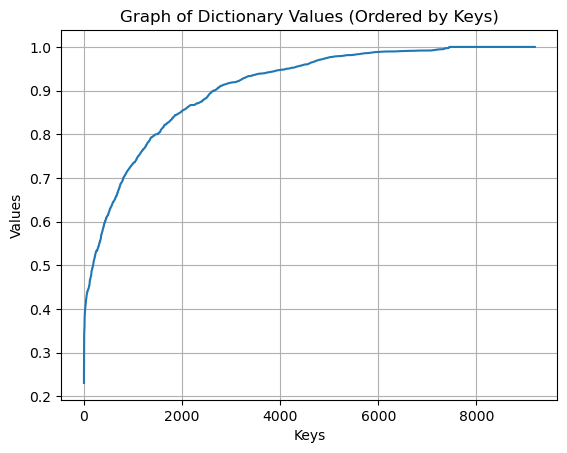

In [11]:
import igraph as ig
import random
from itertools import combinations
from collections import defaultdict

def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0.0

def run_louvain_iterations(g, iterations=10):
    same_community_neighbors = defaultdict(list)

    for _ in range(iterations):
        partition = g.community_multilevel()
        membership = partition.membership

        # Creamos un mapa rápido de nodo -> comunidad
        node_to_comm = {v.index: membership[v.index] for v in g.vs}

        for v in g.vs:
            v_id = v["id"]
            community_neighbors = set()

            for neighbor in g.neighbors(v):
                if node_to_comm[neighbor] == node_to_comm[v.index]:
                    community_neighbors.add(g.vs[neighbor]["id"])

            same_community_neighbors[v_id].append(community_neighbors)

    return same_community_neighbors

def compute_jaccard_stability(same_community_neighbors):
    stability_scores = {}

    for node_id, neighbor_sets in same_community_neighbors.items():
        if len(neighbor_sets) < 2:
            stability_scores[node_id] = 1.0
            continue

        jaccard_scores = []
        for s1, s2 in combinations(neighbor_sets, 2):
            jaccard_scores.append(jaccard_index(s1, s2))

        stability_scores[node_id] = sum(jaccard_scores) / len(jaccard_scores)

    return stability_scores


# Ejecutar el experimento
neighbors_by_iteration = run_louvain_iterations(g, iterations=10)
jaccard_stability = compute_jaccard_stability(neighbors_by_iteration)

# Mostrar algunos resultados
for node, stability in sorted(jaccard_stability.items(), key=lambda x: x[1]):
    print(f"Nodo {node}: Jaccard promedio = {stability:.3f}")


# Create the plot
plt.plot(range(len(jaccard_stability.values())), sorted(list(jaccard_stability.values())))
plt.xlabel("Keys")
plt.ylabel("Values")
plt.title("Graph of Dictionary Values (Ordered by Keys)")
plt.grid(True)
plt.show()


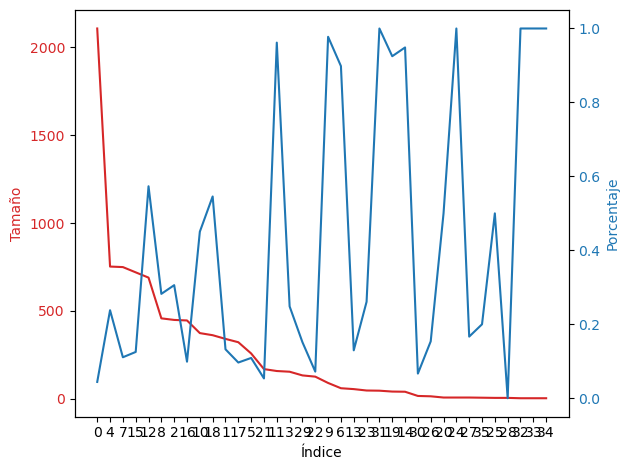

In [12]:


def generar_grafica_doble_eje_y_ordenada(datos):
    """
    Genera una gráfica con dos ejes Y para visualizar tamaño y porcentaje, ordenada por tamaño.

    Args:
        datos (dict): Diccionario donde las claves son los índices y los valores son listas [tamaño, porcentaje].
    """

    # Ordenar los datos por tamaño de forma descendente
    datos_ordenados = dict(sorted(datos.items(), key=lambda item: item[1][0], reverse=True))

    indices = list(datos_ordenados.keys())
    tamanos = [datos_ordenados[indice][0] for indice in indices]
    porcentajes = [datos_ordenados[indice][1] for indice in indices]

    fig, ax1 = plt.subplots()

    # Eje Y izquierdo para el tamaño
    color = 'tab:red'
    ax1.set_xlabel('Índice')
    ax1.set_ylabel('Tamaño', color=color)
    ax1.plot(indices, tamanos, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Eje Y derecho para el porcentaje
    ax2 = ax1.twinx()  # comparte el mismo eje X
    color = 'tab:blue'
    ax2.set_ylabel('Porcentaje', color=color)
    ax2.plot(indices, porcentajes, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # para evitar que las etiquetas se superpongan
    plt.show()

generar_grafica_doble_eje_y_ordenada(otro_dato)

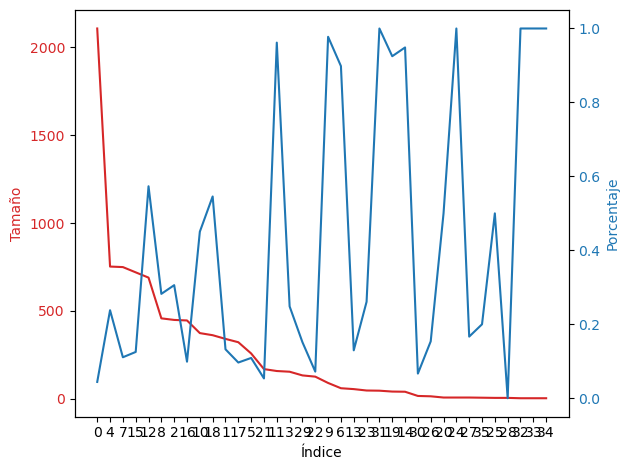

In [13]:
generar_grafica_doble_eje_y_ordenada(otro_dato)

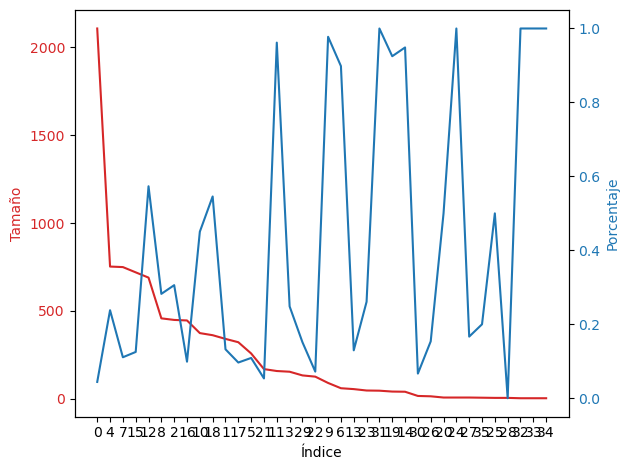

In [19]:
generar_grafica_doble_eje_y_ordenada(otro_dato)

In [23]:
tercero

{'0': [<function Graph.density(loops=False)>, 0.04411764705882353],
 '1': [<function Graph.density(loops=False)>, 0.1323529411764706],
 '2': [<function Graph.density(loops=False)>, 0.30580357142857145],
 '3': [<function Graph.density(loops=False)>, 0.24836601307189543],
 '4': [<function Graph.density(loops=False)>, 0.23803191489361702],
 '5': [<function Graph.density(loops=False)>, 0.10894941634241245],
 '6': [<function Graph.density(loops=False)>, 0.8983050847457628],
 '7': [<function Graph.density(loops=False)>, 0.11081441922563418],
 '8': [<function Graph.density(loops=False)>, 0.28227571115973743],
 '9': [<function Graph.density(loops=False)>, 0.9775280898876404],
 '10': [<function Graph.density(loops=False)>, 0.450402144772118],
 '11': [<function Graph.density(loops=False)>, 0.9617834394904459],
 '12': [<function Graph.density(loops=False)>, 0.5732946298984035],
 '13': [<function Graph.density(loops=False)>, 0.12962962962962962],
 '14': [<function Graph.density(loops=False)>, 0.94

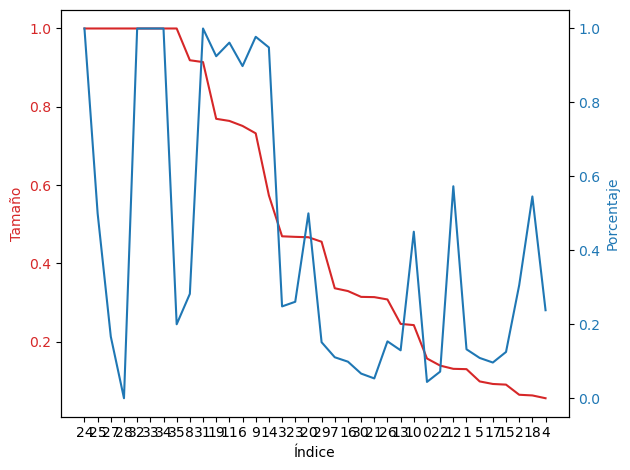

In [26]:


generar_grafica_doble_eje_y_ordenada(tercero)

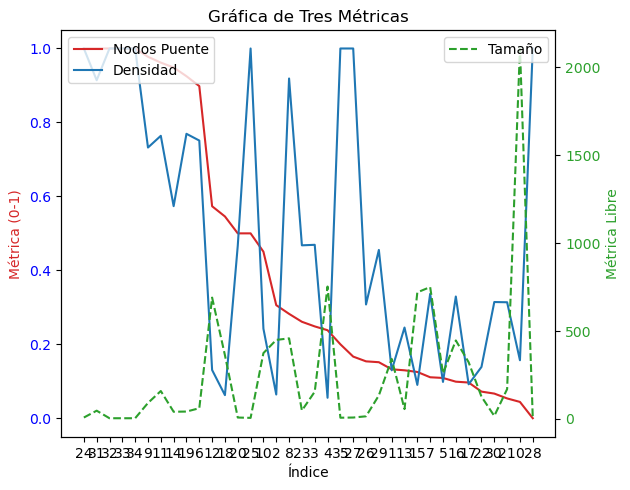

In [39]:
import matplotlib.pyplot as plt


def generar_grafica_tres_metricas_doble_eje_y(datos):
    """
    Genera una gráfica con dos ejes Y para visualizar dos métricas (0-1) en un eje
    y una tercera métrica (rango libre) en otro eje, ordenada por la primera métrica (tamaño).

    Args:
        datos (dict): Diccionario donde las claves son los índices y los valores son listas
                      [metrica_0_a_1_a, metrica_0_a_1_b, metrica_libre].
                      Se ordenará por metrica_0_a_1_a.
    """

    # Ordenar los datos por la primera métrica (se asume que es la más importante para el orden)
    datos_ordenados = dict(sorted(datos.items(), key=lambda item: item[1][0], reverse=True))

    indices = list(datos_ordenados.keys())
    metrica_a = [datos_ordenados[indice][0] for indice in indices]
    metrica_b = [datos_ordenados[indice][1] for indice in indices]
    metrica_libre = [datos_ordenados[indice][2] for indice in indices]

    fig, ax1 = plt.subplots()

    # Eje Y izquierdo para las métricas de 0 a 1
    color1 = 'tab:red'
    ax1.set_xlabel('Índice')
    ax1.set_ylabel('Métrica (0-1)', color=color1)
    ax1.plot(indices, metrica_a, color=color1, label='Nodos Puente')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.plot(indices, metrica_b, color='tab:blue', label='Densidad')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Eje Y derecho para la métrica de rango libre
    ax2 = ax1.twinx()  # comparte el mismo eje X
    color2 = 'tab:green'
    ax2.set_ylabel('Métrica Libre', color=color2)
    ax2.plot(indices, metrica_libre, color=color2, linestyle='--', label='Tamaño')
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.legend(loc='upper right')

    fig.tight_layout()  # para evitar que las etiquetas se superongan
    plt.title("Gráfica de Tres Métricas")
    plt.show()

# Ejemplo de uso:

generar_grafica_tres_metricas_doble_eje_y(tercero)

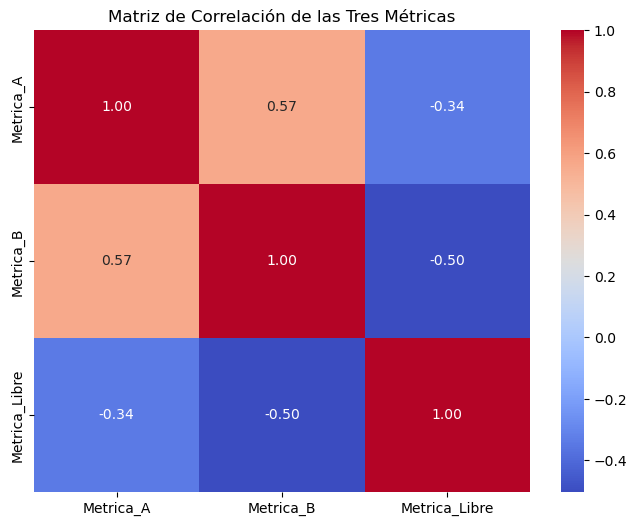

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analizar_correlacion_y_matriz_calor(datos):
    """
    Realiza un análisis de correlación de tres métricas y genera una matriz de calor.

    Args:
        datos (dict): Diccionario donde las claves son los índices y los valores son listas
                      [metrica_0_a_1_a, metrica_0_a_1_b, metrica_libre].
    """
    # Convertir el diccionario a un DataFrame de pandas
    df = pd.DataFrame.from_dict(datos, orient='index', columns=['Metrica_A', 'Metrica_B', 'Metrica_Libre'])

    # Calcular la matriz de correlación
    correlation_matrix = df.corr()

    # Generar la matriz de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación de las Tres Métricas')
    plt.show()

# Ejemplo de uso con los mismos datos:
datos_ejemplo = {
    'A': [0.8, 0.3, 150],
    'B': [0.2, 0.9, 50],
    'C': [0.5, 0.6, 200],
    'D': [0.9, 0.1, 100]
}

analizar_correlacion_y_matriz_calor(tercero)